In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Data Selection

$1)$ Data regarding opioid prescriptions is provided by the $\textit{Center for Medicare and Medicaid Services}$, which can be accessed here: 

https://data.cms.gov/Medicare-Part-D/Medicare-Part-D-Opioid-Prescriber-Summary-File-201/j2ra-95gh

$\textbf{Original Data Information}$

Provided By: CMS

Contact Email: MedicareProviderData@cms.hhs.gov

Bureau Code: 	009:38

Program Code: 009.000

Last Updated: February 8, 2021 

Number of Rows: 1,204,935

Number of Columns: 11



In [2]:
op_data = pd.read_csv("op_2021_data.csv")
op_data = op_data.rename(columns = {'NPPES Provider Last Name': 'last_name',
                                    'NPPES Provider First Name': 'first_name',
                                    'NPPES Provider ZIP Code': 'zip_code', 'NPPES Provider State':'state',
                                    'Specialty Description':'doc_spec',
                                    'Total Claim Count': 'tot_presc_cnt',
                                    'Opioid Claim Count':'op_cnt', 'Opioid Prescribing Rate' : 'op_rate',
                                    'Long-Acting Opioid Claim Count': 'LA_op_cnt',
                                    'Long-Acting Opioid Prescribing Rate': 'LA_op_rate'})
op_data.head()

,NPI,last_name,first_name,zip_code,state,doc_spec,tot_presc_cnt,op_cnt,op_rate,LA_op_cnt,LA_op_rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,492,13.0,0.03,NaN,NaN
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1818,891.0,0.49,143.0,0.16
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,77,NaN,NaN,0.0,NaN
3,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,100,0.0,0.00,0.0,NaN
4,1003000407,GIRARDI,DAVID,15825.0,PA,Family Practice,2766,22.0,0.01,NaN,NaN


$\textbf{The dataset contains the following values:}$

- NPI: National Provider Identifier for Doctor Identification.

- last_name:  Prescribing Doctor's Last Name.

- first_name: Prescribing Doctor's First Name.

- zip_code: Zip code of the doctor's location.

- state: Prescribing Doctor's location.

- doc_spec: Specialty of Doctor.

- tot_presc_cnt: Total amount of prescriptions by the doctor (inclusive of non-opioids).

- op_cnt: Amount of opioid prescriptions by the doctor.

- op_rate: Changes in the amount of opioid prescriptions over time by each individual doctor.

- LA_op_cnt: Amount of Long-Acting opioid prescriptions by the doctor.

- LA_op_rate: Changes in the amount of Long-Acting opioid prescriptions over time by each individual doctor. 

$\textbf{Data reguarding average incomes in different area codes is originally provided by the \textbf{Internal Revenue Service (IRS)} , which can be accessed here:}$

https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi

$\textbf{Data that I will be using has been cleaned and posted for public access by Jon Loyens on data.world, which can be accessed here:}$

https://data.world/jonloyens/irs-income-by-zip-code

$\textbf{Original Data Information}$

Provided By: Jon Loyens

Contact Address: @jonloyens (twitter)

Last Updated: June 16, 2016

Number of Rows: 27,790

Number of Columns: 11


In [3]:
income_data = pd.read_csv("IRSIncomeByZipCode.csv")
income_data = income_data.rename(columns = {'STATE':'state', 'ZIPCODE': 'zip_code',
                                'Number of returns' : 'num_tax_ret', 
                                'Adjusted gross income (AGI)': 'zip_agi',
                                'Avg AGI': 'zip_avg_agi',
                                'Number of returns with total income': 'ret_w_total',
                                'Total income amount' : 'sum_zip_income',
                                'Avg total income':'zip_avg_income',
                                'Number of returns with taxable income':'num_ret_taxable',
                                'Taxable income amount': 'taxable_amt',
                                'Avg taxable income':'avg_taxable'})
income_data.head()

,state,zip_code,num_tax_ret,zip_agi,zip_avg_agi,ret_w_total,sum_zip_income,zip_avg_income,num_ret_taxable,taxable_amt,avg_taxable
0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681


$\textbf{The dataset contains the following values:}$

- state: The state the zip code is located in.

- zip_code: Zip code.

- num_tax_ret: The number of tax returns filed in 2016.

- zip_agi: Adjusted gross income for residents in a zip.

- zip_avg_agi: Average gross income for residents in a zip.

- ret_w_total: Number of income tax returns with total income. 

- sum_zip_income: Summation of all incomes of residents in a zip code.

- avg_income: Average income of residents in a zip code, in the thousands. (i.e. 52.3 = 52,300 amount earned, on average, by residents in a shared zip code)

- num_ret_taxable: Number of income tax returns with taxable income. 

- taxable_amt: Summation of the total amount a zip can be taxed. 

- avg_taxable: Average total taxable income for each area code, in the thousands. (i.e. 40.76 = 40,760 income tax paid by that zip code in 2016)

## Part 2: Cleaning

Now we will clean up our dataframe for prescription data and income data by removing unnessicary rows/columns and editing corrupted or non-existant values. 

In [4]:
#Scrubbing Prescription Data
#removing individual doctor identification, name, and total presciption count (tot_presc_cnt as it 
#contains non-opioid data).
op_data = op_data[['zip_code', 'state', 'doc_spec', 'op_cnt', 'op_rate', 'LA_op_cnt', 'LA_op_rate']]
#removing doctors who have not prescribed any opioids
op_data = op_data[op_data['op_cnt'] > 0]

#changing zip_code from type float to type int
op_data['zip_code'] = op_data['zip_code'].values.astype(int)
#replacing Nan values in LA_op to 0, as Nan represents long acting opioids were not prescribed
op_data['LA_op_cnt'] = op_data['LA_op_cnt'].replace(np.nan, 0)
op_data['LA_op_rate'] = op_data['LA_op_rate'].replace(np.nan, 0)

#Scrubbing income data
#removing unnecessary columns
income_data = income_data[['state', 'zip_code', 'zip_avg_income']]
#removing all non 5 digit zip codes, false data
income_data = income_data[income_data['zip_code'].astype(str).str.len() == 5]

## Part 3: Merging DataFrames

Now, we will merge our two dataframes, op_data, which contains prescription information as well as ZIP, and income_data, which contains income information as well as ZIP. We will combine on the ZIP datapoint, and data from income will be merged onto the op_data dataframe (op_data will remain stable). 

In [5]:
op_data = op_data.merge(right = income_data)
op_data

,zip_code,state,doc_spec,op_cnt,op_rate,LA_op_cnt,LA_op_rate,zip_avg_income
0,21502,MD,Internal Medicine,13.0,0.03,0.0,0.00,45.932160
1,21502,MD,Hospitalist,17.0,0.03,0.0,0.00,45.932160
2,21502,MD,Pain Management,994.0,0.71,224.0,0.23,45.932160
3,21502,MD,Nurse Practitioner,106.0,0.14,0.0,0.00,45.932160
4,21502,MD,Physician Assistant,26.0,0.01,0.0,0.00,45.932160
...,...,...,...,...,...,...,...,...
361974,31805,GA,Internal Medicine,12.0,0.07,0.0,0.00,32.347899
361975,81418,CO,Physician Assistant,112.0,0.39,0.0,0.00,43.157576
361976,38659,MS,Nurse Practitioner,21.0,0.01,0.0,0.00,38.785849
361977,39201,MS,Hospital,19.0,0.73,0.0,0.00,182.073333


## Part 4: EDA

We will now produce visualizations using our finalized dataset, \textbf{op_data}.

$\textbf{1)}$ First, I would like to solve my primary question: Are opioids prescribed more frequently in certain states or zip codes with higher average income?

In [6]:
#creating a temp dataframe zip_data to preserve original values when removing outliers and other data points
#removing outliers for greater clarity 

zip_df = op_data.groupby('zip_code').mean()

zip_df = zip_df[zip_df['zip_avg_income'] < 200]
zip_df = zip_df[zip_df['op_cnt'] < 1000]



zip_df['income_bin'] = zip_df['zip_avg_income'].values.astype(int)
zip_df.head()

,op_cnt,op_rate,LA_op_cnt,LA_op_rate,zip_avg_income,income_bin
zip_code,,,,,,
10001,40.243243,0.086216,3.297297,0.040000,155.101676,155
10002,49.833333,0.025714,2.761905,0.045000,46.846786,46
10006,29.000000,0.182500,0.000000,0.000000,181.589407,181
10009,44.833333,0.065833,3.083333,0.014167,72.640410,72
10025,68.031915,0.137128,4.489362,0.060957,133.870043,133


Text(0, 0.5, 'Mean Opioid Prescriptions')

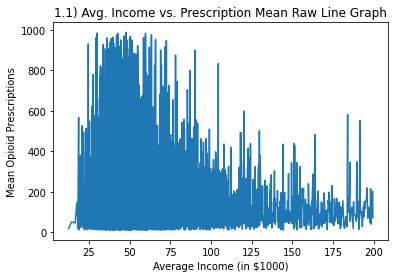

In [7]:
sns.lineplot(data = zip_df, x  = zip_df['zip_avg_income'], y = zip_df['op_cnt'])
plt.title('1.1) Avg. Income vs. Prescription Mean Raw Line Graph')
plt.xlabel('Average Income (in $1000)')
plt.ylabel('Mean Opioid Prescriptions')

Text(-2.450000000000003, 0.5, 'Mean Opioid Prescriptions')

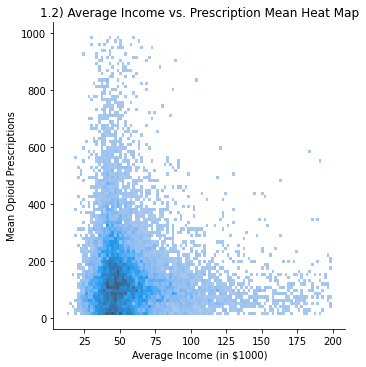

In [8]:
sns.displot(zip_df, x = 'zip_avg_income', y = 'op_cnt')

plt.title('1.2) Average Income vs. Prescription Mean Heat Map')
plt.xlabel('Average Income (in $1000)')
plt.ylabel('Mean Opioid Prescriptions')

As the heatmap plot above can be difficult to read, we will use a Kernal Density Estimate (KDE) on the bivariate distribution to smooth the x,y obervations with a 2D Gaussian plane. The more confined circles show more prescriptions writting for the respective income. 

Text(-2.450000000000003, 0.5, 'Mean Opioid Prescriptions')

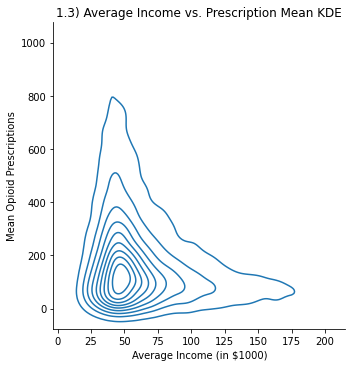

In [9]:
sns.displot(zip_df, x = 'zip_avg_income', y = 'op_cnt', kind = 'kde')

plt.title('1.3) Average Income vs. Prescription Mean KDE')
plt.xlabel('Average Income (in $1000)')
plt.ylabel('Mean Opioid Prescriptions')

$\textbf{2)}$ 
Now we will group our data values by state, using the income of all zips in a state to create a column for each state's average income, labeled \textbf{'state_avg_income'}. Certain states have additional limitations reguarding prescription. For instance, California requires that opioid naive (first time opioid users) must be limited to a 7 day (or less) prescription. 

States using additonal limitations reguarding opioids also include:
Alaska, Hawaii, Colorado, Utah, Oklahoma, Louisiana, Missouri, Indiana, West Virginia, South Carolina, Pennsylvania, New York, Maine, Arizona, North Carolina, and New Jersy. These states are marked in GREEN.

[Text(0, 0, 'MT'),
 Text(1, 0, 'NM'),
 Text(2, 0, 'MS'),
 Text(3, 0, 'SC'),
 Text(4, 0, 'AR'),
 Text(5, 0, 'WV'),
 Text(6, 0, 'MI'),
 Text(7, 0, 'OH'),
 Text(8, 0, 'IN'),
 Text(9, 0, 'IA'),
 Text(10, 0, 'AK'),
 Text(11, 0, 'ID'),
 Text(12, 0, 'KY'),
 Text(13, 0, 'AL'),
 Text(14, 0, 'OK'),
 Text(15, 0, 'WI'),
 Text(16, 0, 'DE'),
 Text(17, 0, 'GA'),
 Text(18, 0, 'HI'),
 Text(19, 0, 'UT'),
 Text(20, 0, 'AZ'),
 Text(21, 0, 'OR'),
 Text(22, 0, 'PA'),
 Text(23, 0, 'ND'),
 Text(24, 0, 'MN'),
 Text(25, 0, 'TN'),
 Text(26, 0, 'NE'),
 Text(27, 0, 'NV'),
 Text(28, 0, 'NC'),
 Text(29, 0, 'LA'),
 Text(30, 0, 'FL'),
 Text(31, 0, 'SD'),
 Text(32, 0, 'MO'),
 Text(33, 0, 'KS'),
 Text(34, 0, 'VA'),
 Text(35, 0, 'WA'),
 Text(36, 0, 'WY'),
 Text(37, 0, 'CO'),
 Text(38, 0, 'MD'),
 Text(39, 0, 'TX'),
 Text(40, 0, 'IL'),
 Text(41, 0, 'CA'),
 Text(42, 0, 'NY'),
 Text(43, 0, 'DC')]

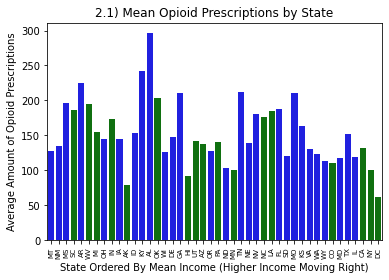

In [10]:
state_df = op_data.groupby('state').mean()
state_df = state_df.rename(columns = {'zip_avg_income': 'state_avg_income'})
#reordering dataframe to go in order from low to high average income states
state_df = state_df.sort_values(by = ['state_avg_income'])

special_states = np.array(['AK', 'HI', 'CO', 'UT', 'OK', 'LA', 'MI', 'IN', 'WV', 'SC', 'PA', 'NY', 'CA', 'NJ', 
                           'NC','AZ', 'MN', 'DC'])

mark_spec_states = ['green' if (x in special_states) else 'blue' for x in state_df.index]
bplot = sns.barplot(data = state_df, x = state_df.index, y = 'op_cnt', palette = mark_spec_states)

plt.title('2.1) Mean Opioid Prescriptions by State')
plt.xlabel('State Ordered By Mean Income (Higher Income Moving Right)')
plt.ylabel('Average Amount of Opioid Prescriptions')
bplot.set_xticklabels(bplot.get_xticklabels(),rotation = 90, size = 7)

$\textbf{3)}$ Additionally, I want to also find out if long acting opioid treatment therapy is used more often in higher income areas. 

Text(0, 0.5, 'Mean Long-Acting Opioid Prescriptions')

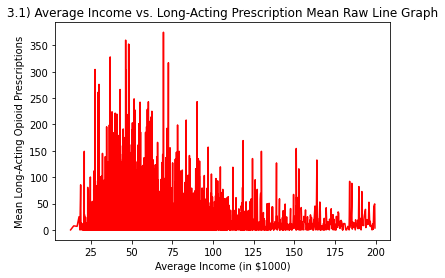

In [11]:
sns.lineplot(data = zip_df, x  = zip_df['zip_avg_income'], y = zip_df['LA_op_cnt'], color = 'red')

plt.title('3.1) Average Income vs. Long-Acting Prescription Mean Raw Line Graph')
plt.xlabel('Average Income (in $1000)')
plt.ylabel('Mean Long-Acting Opioid Prescriptions')

Text(3.674999999999997, 0.5, 'Mean Long-Acting Opioid Prescriptions')

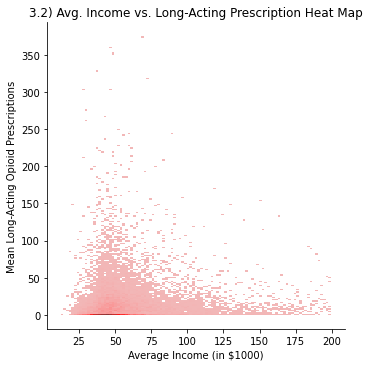

In [12]:
sns.displot(zip_df, x = 'zip_avg_income', y = 'LA_op_cnt', color = 'red')

plt.title('3.2) Avg. Income vs. Long-Acting Prescription Heat Map')
plt.xlabel('Average Income (in $1000)')
plt.ylabel('Mean Long-Acting Opioid Prescriptions')

Once again, as our heatmap can be difficult to read, we will once again create a KDE.

Text(3.674999999999997, 0.5, 'Mean Long-Acting Opioid Prescriptions')

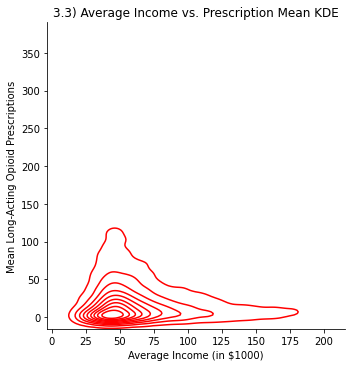

In [13]:
sns.displot(zip_df, x = 'zip_avg_income', y = 'LA_op_cnt', kind = 'kde', color = 'red')
plt.title('3.3) Average Income vs. Prescription Mean KDE')
plt.xlabel('Average Income (in $1000)')
plt.ylabel('Mean Long-Acting Opioid Prescriptions')

$\textbf{4)}$ Finally, I would like to see the change in prescriber rates for both regular and Long-Acting opioid prescriptions over the last 5 years. Our DataSet has 2 columns that hold this information, \textbf{op_rate} and \textbf{LA_op_rate}, which show percent changes over the course of the last 5 years for each individual doctor.

Percent Change for Regular Acting Opiods:  11.963899114347573
Percent Change for Long Acting Opiods:  4.264856919322507


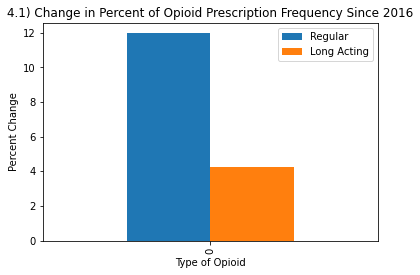

In [14]:
zip_df['op_rate'].mean()
time_df = pd.DataFrame()
time_df['Regular'] = [zip_df['op_rate'].mean() * 100]
time_df['Long Acting'] = [zip_df['LA_op_rate'].mean() * 100]
time_df.plot.bar()
plt.title('4.1) Change in Percent of Opioid Prescription Frequency Since 2016')
plt.xlabel('Type of Opioid')
plt.ylabel('Percent Change')
print('Percent Change for Regular Acting Opiods: ', time_df['Regular'][0])
print('Percent Change for Long Acting Opiods: ', time_df['Long Acting'][0])

## Conclusion
A: Opioids appear to be less frequently prescribed in regions with a higher average income, as shown by the stretching in fig.1.3 as well as the heat map (fig.1.2). The mean prescription density spreads horizontally and drops steeply and significantly after region incomes of USD 50,000. Thus, we can see as income increases, opioid prescription frequency decreases. There is also a decrease in opioid prescribing for income areas below USD 25,000. One possible explanation for this could be an inability to afford proper healthcare and be able to see a doctor to prescribed opioids- even if they may really need them.


B: From looking at graph 2.1, cannot definitively conclude that states with higher average incomes have lower frequency of opioid prescriptions. However, it can be observed that states placing additional, more stringent requirements on prescriptions have distinctive decreases in mean opioid prescriptions. 


C: Although there is similar decrease in frequency as income increases between regular and Long-Acting opioids, it is notable that there is much quicker decreases for short acting. Thus, to some extent, there can be a greater frequency of prescribing LA opioids instead for higher income areas, even though the average amount of opioids prescribed still remains lower for higher income areas. A possible explanation for this is that those in higher income areas may live busier life, and thus doctors may prescribe Long-Acting to prevent skipped or forgotten doses. 


D: There has been a 11.91% increase in regular acting prescriptions and 4.24% increase in Long-Acting prescriptions for opioids over the last 5 years.
